## 导入文件
- sheet_name=2（实际sheet3）

In [1]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=2)

# 取第2-25行数据（即Globular proteins数据），同理取其他的
df_globular  = df.iloc[0:24, :]
df_membrane = df.iloc[24:48, :]
df_fibrous = df.iloc[48:72, :]
df_unstructured = df.iloc[72:96, :]

# 将四个DataFrame合并成一个DataFrame  
df = pd.concat([df_globular.assign(label='Globular'), 
                df_membrane.assign(label='Membrane'), 
                df_fibrous.assign(label='Fibrous'),
                df_unstructured.assign(label='Unstructured')])

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        340  0.99373     0.98579         NaN         NaN         NaN   
1        482  0.79617     0.98924         NaN         NaN         NaN   
2        442  0.93410     0.99215         NaN         NaN         NaN   
3        309  0.97439     0.99962         NaN         NaN         NaN   
4        311  0.97639     0.96386         NaN         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM     label  
0         NaN         NaN         NaN  Globular  
1         NaN         NaN         NaN  Globular  
2         NaN         NaN     0.75291  Globular  
3         NaN         NaN     0.83466  Globular  
4         NaN     0.78728     0.91986  Globular  
样本总量为:  96


## 【反向思考】
#### 单独提取af>0.5的部分，看优点
#### 同理af<0.5，看风险

> ['AF-TM'] < 0.5 或者 ['AF-TM'] > 0.5

In [2]:
# Filter rows where the value of the 'AF-RMSD' column is MORE than 0.5
df_filtered = df[df['AF-TM'] < 0.5]

# 输出前5行数据
print(df_filtered.head(10))


    Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
24        979  0.20220         NaN     0.24807     0.25489     0.24844   
25        979  0.12576         NaN     0.24753     0.24926     0.24797   
28         43  0.46885     0.45848         NaN         NaN         NaN   
66        148  0.33750     0.21324     0.11359         NaN         NaN   
72        988  0.33495     0.31874         NaN         NaN         NaN   
76        817  0.25212     0.98135     0.20518         NaN     0.86396   
81         94  0.29882     0.89439         NaN         NaN         NaN   
89        199  0.15190     0.94324         NaN         NaN         NaN   
90        817  0.25212     0.98135     0.20518         NaN     0.86396   
94        323  0.40408         NaN     0.39758     0.83097         NaN   

    0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM         label  
24     0.24016         NaN     0.83365      Membrane  
25     0.24025         NaN     0.83545      Membrane  
28         NaN      

### 输出af结果

样本总量为:  10


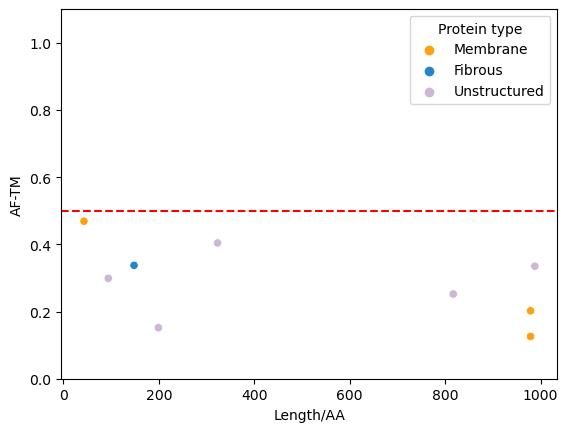

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# result=result3

sns.scatterplot(x='Length/AA', y='AF-TM', hue='label', data=df_filtered, palette={'Globular': '#ee4c61', 'Membrane': '#fca210', 'Fibrous': '#2485cc', 'Unstructured': '#ceb6d6'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='upper right', title='Protein type')

# 计算'Length/AA'列的样本总量并输出结果
count = df_filtered['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

### 输出sm结果
> 选个SM

In [23]:
# SM='1.0-0.9-TM'
# SM='0.9-0.8-TM'
# SM='0.8-0.7-TM'
# SM='0.7-0.6-TM'
# SM='0.6-0.5-TM'
# SM='0.5-0.4-TM'
SM='0.4-0.3-TM'

样本总量为:  10


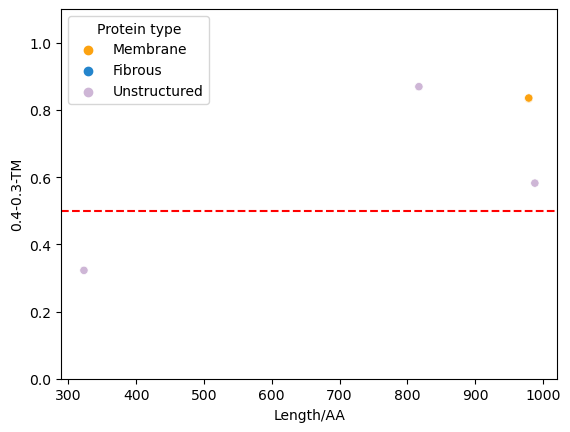

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y=SM, hue='label', data=df_filtered, palette={'Globular': '#ee4c61', 'Membrane': '#fca210', 'Fibrous': '#2485cc', 'Unstructured': '#ceb6d6'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='best', title='Protein type')

# 计算'Length/AA'列的样本总量并输出结果
count = df_filtered['Length/AA'].count()
print("样本总量为: ", count)

plt.show()